In [303]:
import numpy as np
import pandas as pd

In [305]:
import pandas as pd

# Try reading the file with different encodings
try:
    df = pd.read_csv(r"spam.csv", encoding="ISO-8859-1")
except UnicodeDecodeError:
    df = pd.read_csv(r"spam.csv", encoding="latin1")


In [307]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3401,ham,'An Amazing Quote'' - \Sometimes in life its d...,NaN,NaN,NaN
1450,ham,Msg me when rajini comes.,NaN,NaN,NaN
2275,ham,Is that on the telly? No its Brdget Jones!,NaN,NaN,NaN
472,ham,Nothing. I meant that once the money enters yo...,NaN,NaN,NaN
2734,ham,Can you do a mag meeting this avo at some point?,NaN,NaN,NaN


In [309]:
df.shape

(5572, 5)

In [311]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [315]:
df.drop(columns=['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [317]:
df.sample(5)

,v1,v2
1687,spam,Free Top ringtone -sub to weekly ringtone-get ...
1917,ham,We not leaving yet. Ok lor then we go elsewher...
3127,ham,would u fuckin believe it they didnt know i ha...
469,ham,There are many company. Tell me the language.
408,ham,Headin towards busetop


In [319]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [321]:
df.sample(5)

,Target,Text
358,ham,"I'm an actor. When i work, i work in the eveni..."
153,ham,As per your request 'Melle Melle (Oru Minnamin...
5469,ham,Ok lor.
3154,ham,Ok...
25,ham,Just forced myself to eat a slice. I'm really ...


In [323]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [325]:
df['Target'] = encoder.fit_transform(df['Target'])

In [327]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [329]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [331]:
df.duplicated().sum(







    
)

403

In [333]:
df = df.drop_duplicates(keep='first')

In [335]:
df.duplicated().sum()

0

In [337]:
df.shape

(5169, 2)

In [339]:
###EDA####

In [341]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [343]:
import matplotlib.pyplot as plt

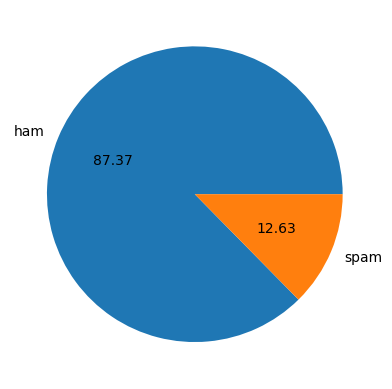

In [345]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [347]:

#Data is imbalance


In [349]:
import nltk

In [351]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhavi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [352]:
# Modify the 'Length_Text' column in the original DataFrame using .loc
df.loc[:, 'Length_Text'] = df['Text'].apply(len)


In [353]:
df.loc[:, 'no.of.words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [356]:
# Use .loc explicitly to modify the DataFrame
df.loc[:, 'num_sentence'] = df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [357]:
df.head()

,Target,Text,Length_Text,no.of.words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [358]:
df.head()

,Target,Text,Length_Text,no.of.words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [359]:
df.describe()

,Target,Length_Text,no.of.words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [361]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Length_Text', ylabel='Count'>

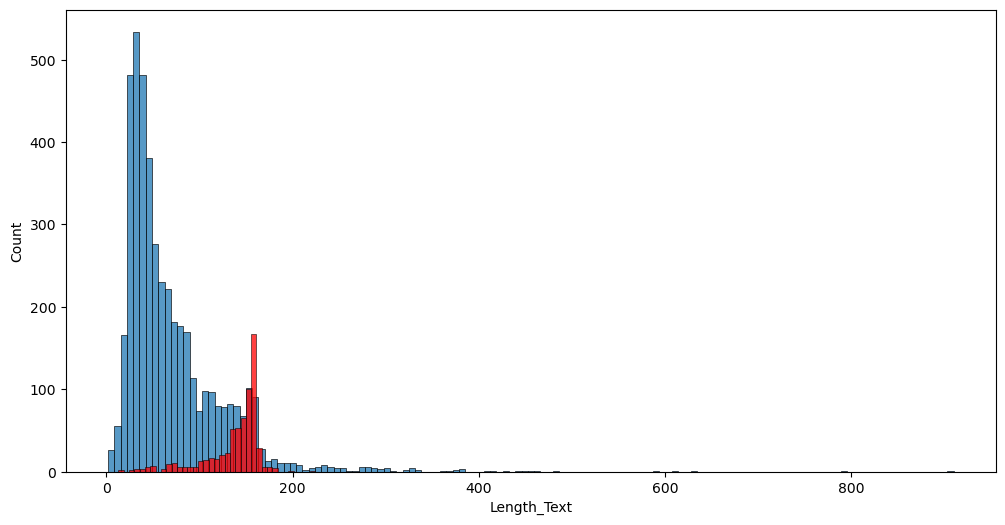

In [367]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['Length_Text'])
sns.histplot(df[df['Target']==1]['Length_Text'],color='red')

<Axes: xlabel='no.of.words', ylabel='Count'>

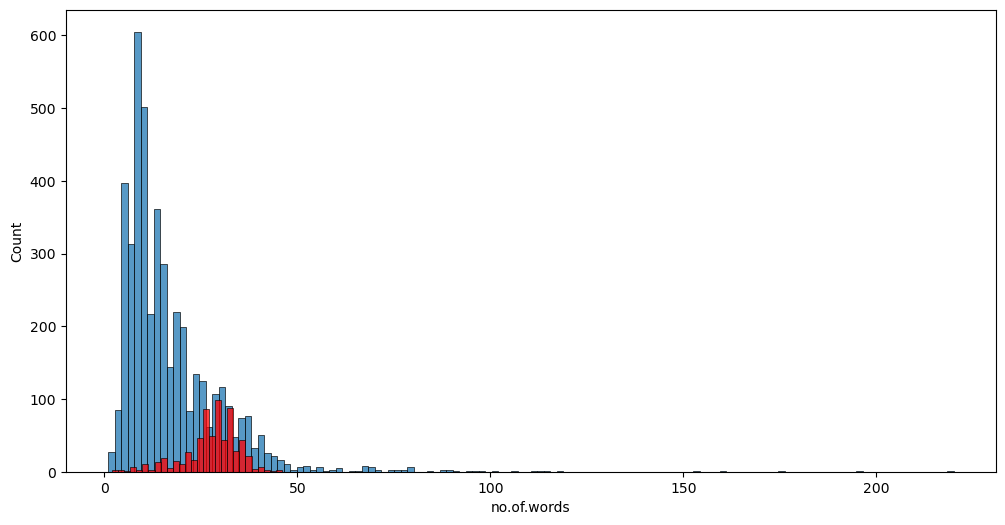

In [368]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['no.of.words'])
sns.histplot(df[df['Target']==1]['no.of.words'],color='red')

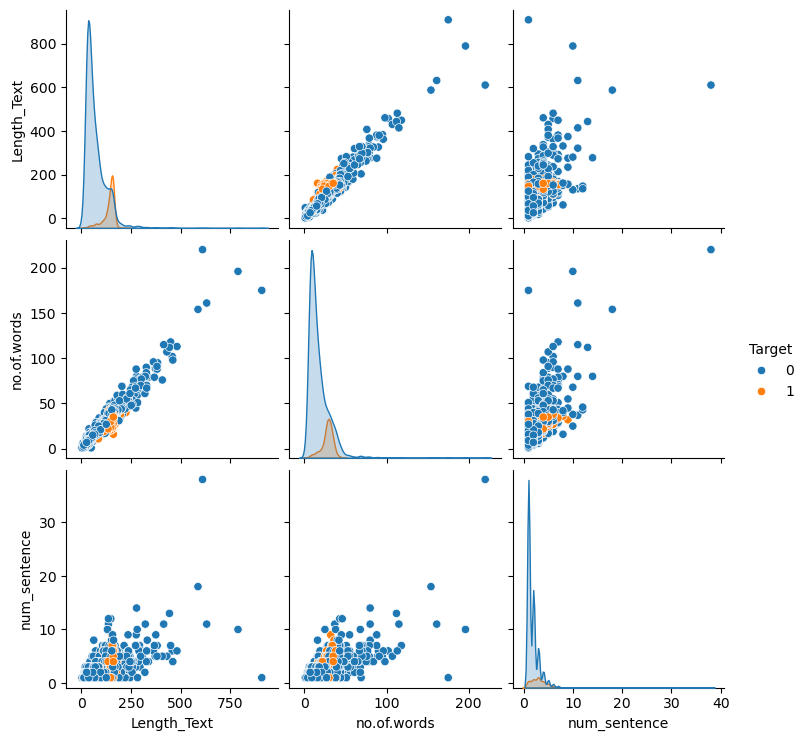

In [369]:
sns.pairplot(df,hue='Target')

In [371]:
##Data contains outlier##

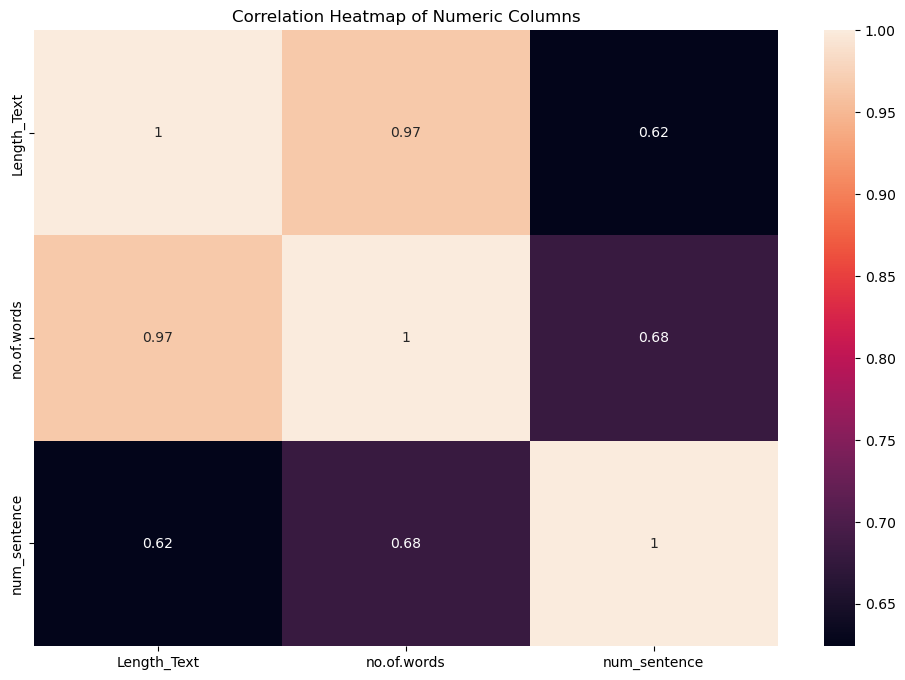

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [377]:
df.dtypes

Target           int32
Text            object
Length_Text      int64
no.of.words      int64
num_sentence     int64
dtype: object

In [379]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [381]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [383]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [387]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

# Initialize the Porter Stemmer
ps = PorterStemmer()

def transform_text(text):
    y = []
    text = text.lower()  # Convert text to lowercase
    text = nltk.word_tokenize(text)  # Tokenize the text

    # Keep only alphanumeric tokens
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Clear and filter out stopwords and punctuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stem each word
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    # Join the list back into a single string
    return " ".join(y)




In [389]:
transform_text(df['Text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [391]:
df['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [392]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [393]:
df.head()

,Target,Text,Length_Text,no.of.words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [394]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [395]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [396]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

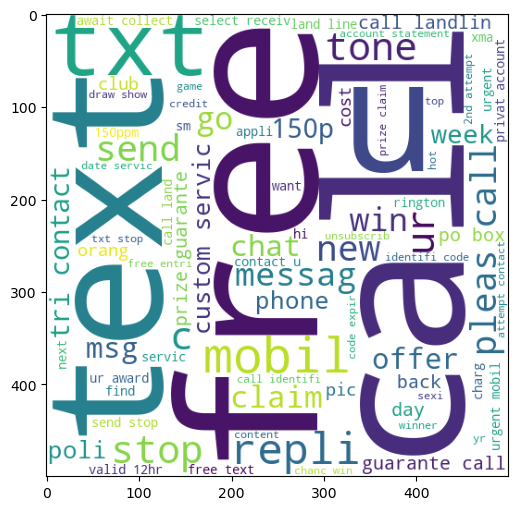

In [397]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [398]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

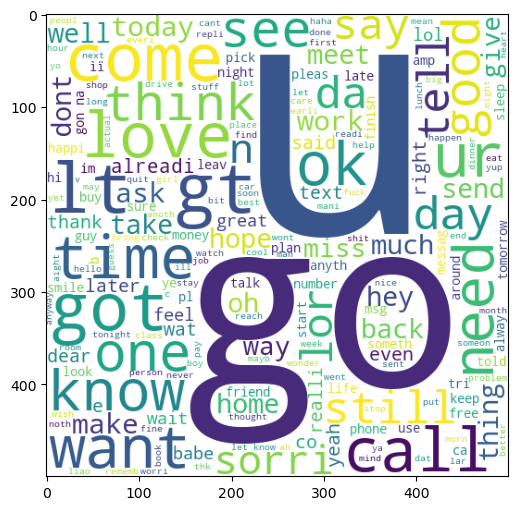

In [399]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [400]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [401]:
len(spam_corpus)

9939

In [402]:
pip install collection

Note: you may need to restart the kernel to use updated packages.


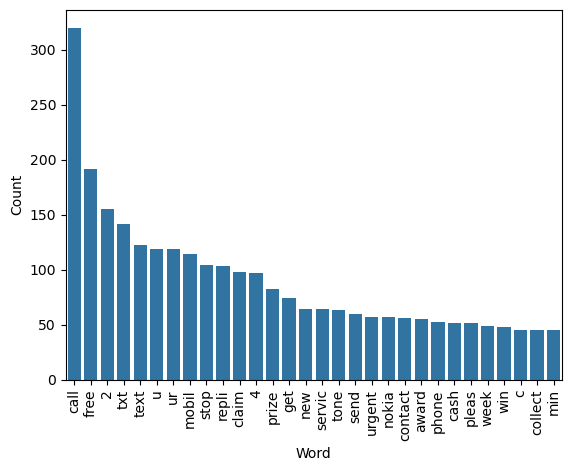

In [403]:
from collections import Counter
common_words = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the common words
df_common = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=df_common)

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')      

# Show the plot
plt.show()

In [404]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [405]:
len(ham_corpus)

35404

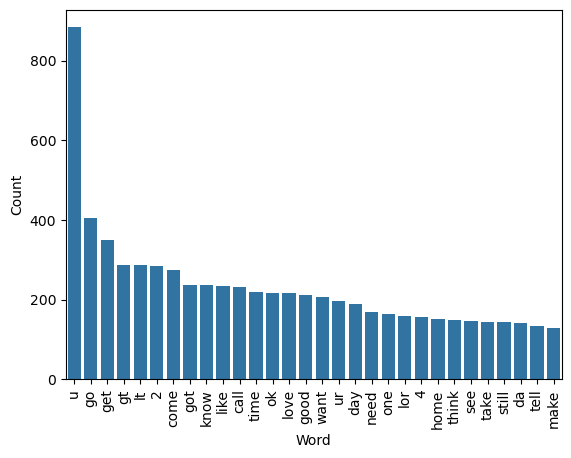

In [406]:
from collections import Counter
common_words = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the common words
df_common = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Create a bar plot
sns.barplot(x='Word', y='Count', data=df_common)

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')      

# Show the plot
plt.show()

In [407]:
####model building###

In [408]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)  


In [409]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [410]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [411]:
X.shape

(5169, 3000)

In [412]:
y = df['Target'].values

In [413]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [414]:
from sklearn.model_selection import train_test_split

In [415]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [416]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [417]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [418]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy of GaussianNB:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred1)
print("Confusion Matrix:\n", conf_matrix)
precision = precision_score(y_test, y_pred1, average='macro')  
print("Precision Score:", precision)

Accuracy of GaussianNB: 0.8723404255319149
Confusion Matrix:
 [[782 114]
 [ 18 120]]
Precision Score: 0.7451602564102564


In [419]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy of MultinomialNB:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:\n", conf_matrix)
precision = precision_score(y_test, y_pred2, average='macro')  
print("Precision Score:", precision)

Accuracy of MultinomialNB: 0.9787234042553191
Confusion Matrix:
 [[889   7]
 [ 15 123]]
Precision Score: 0.9647804628999319


In [451]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy of BeurnolliNB:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:\n", conf_matrix)
precision = precision_score(y_test, y_pred3, average='macro')  
print("Precision Score:", precision)

Accuracy of BeurnolliNB: 0.9835589941972921
Confusion Matrix:
 [[895   1]
 [ 16 122]]
Precision Score: 0.9871534006229195


In [453]:
import pickle 
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(bnb,open('model.pkl','wb'))